In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

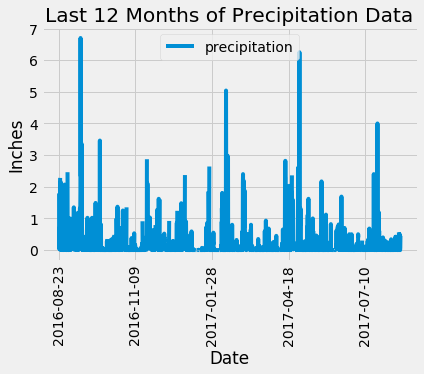

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date
query_date = dt.date(2017, 8, 23)-dt.timedelta(days = 365)
query_date
date_precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
precip_df = pd.DataFrame(date_precipitation, columns = ["date", "precipitation"])
precip_df.set_index(precip_df["date"], inplace = True)
precip_df.drop(columns=["date"], inplace = True)
precip_df = precip_df.sort_values("date")
# Calculate the date 1 year ago from the last data point in the database

# Perform aquery to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(rot = 90)

# Set a title for the chart
plt.title("Last 12 Months of Precipitation Data")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_statistics = precip_df.describe()
summary_statistics

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
# Design a query to show how many stations are available in this dataset?
inspector = inspect(engine)
columns = inspector.get_columns('station')
print(columns)
station_count = session.query(func.count(Station.station)).scalar()
station_count

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


9

In [62]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_station = active_stations[0][0]
most_active_station

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


'USC00519281'

In [72]:
active_stations = session.query(Measurement.station, Measurement.tobs).all()
stations = pd.DataFrame(active_stations, columns = ["station", "tobs"])
stations_gb = stations.groupby("station")
print(stations_gb)
for name, df in stations_gb:
    print(name, df)

USC00511918            station  tobs
14959  USC00511918  66.0
14960  USC00511918  70.0
14961  USC00511918  75.0
14962  USC00511918  75.0
14963  USC00511918  75.0
...            ...   ...
16933  USC00511918  74.0
16934  USC00511918  72.0
16935  USC00511918  82.0
16936  USC00511918  68.0
16937  USC00511918  64.0

[1979 rows x 2 columns]
USC00513117           station  tobs
2724  USC00513117  67.0
2725  USC00513117  65.0
2726  USC00513117  75.0
2727  USC00513117  76.0
2728  USC00513117  76.0
...           ...   ...
5428  USC00513117  77.0
5429  USC00513117  77.0
5430  USC00513117  78.0
5431  USC00513117  78.0
5432  USC00513117  77.0

[2709 rows x 2 columns]
USC00514830           station  tobs
5433  USC00514830  67.0
5434  USC00514830  70.0
5435  USC00514830  68.0
5436  USC00514830  67.0
5437  USC00514830  67.0
...           ...   ...
7630  USC00514830  77.0
7631  USC00514830  80.0
7632  USC00514830  80.0
7633  USC00514830  79.0
7634  USC00514830  82.0

[2202 rows x 2 columns]
USC00516128  

In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temp_analysis = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                              filter(Measurement.station == most_active_station).all()
temp_analysis

[(54.0, 85.0, 71.66378066378067)]

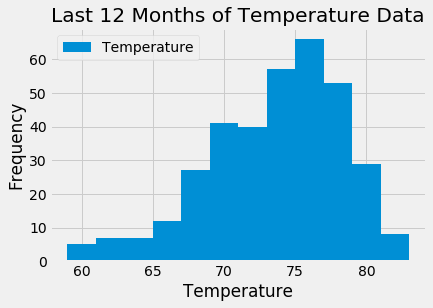

In [83]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).\
        group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
temp_highest = temp_obs[0][0]
temp_highest
last_12 = session.query(Measurement.tobs).\
        filter(Measurement.station == most_active_station).\
        filter(Measurement.date >= query_date).all()
last_12 = pd.DataFrame(last_12, columns = ["Temperature"])
last_12.plot.hist(bins = 12)
plt.title("Last 12 Months of Temperature Data")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
